
#3  Plotting

Let’s learn the basics of plotting with pandas to make things more interesting.

To get us started, we will use again the simplified data (glacial_loss.csv) from the National Snow and Ice Data Center (Original dataset). The column descriptions are:

    year: ​calendar year
    europe - antarctica: ​change in glacial volume (km3​ ​) in each region that year
    global_glacial_volume_change: ​cumulative​ global glacial volume change (km3), starting in 1961
    annual_sea_level_rise: ​annual rise in sea level (mm)
    cumulative_sea_level_rise:​ cumulative rise in sea level (mm) since 1961


In [11]:
import pandas as pd

# read in file
df = pd.read_csv('~/EDS220/eds-220-lesson2-pandas/glacial_loss.csv')

# see the first five rows
df.head()

,year,europe,arctic,alaska,asia,north_america,south_america,antarctica,global_glacial_volume_change,annual_sea_level_rise,cumulative_sea_level_rise
0,1961,-5.128903,-108.382987,-18.721190,-32.350759,-14.359007,-4.739367,-35.116389,-220.823515,0.610010,0.610010
1,1962,5.576282,-173.252450,-24.324790,-4.675440,-2.161842,-13.694367,-78.222887,-514.269862,0.810625,1.420635
2,1963,-10.123105,-0.423751,-2.047567,-3.027298,-27.535881,3.419633,3.765109,-550.575640,0.100292,1.520927
3,1964,-4.508358,20.070148,0.477800,-18.675385,-2.248286,20.732633,14.853096,-519.589859,-0.085596,1.435331
4,1965,10.629385,43.695389,-0.115332,-18.414602,-19.398765,6.862102,22.793484,-473.112003,-0.128392,1.306939


# `plot()` method

A pandas.DataFrame has a built-in method plot() for plotting. When we call it without specifying any other parameters plot() creates one line plot for each of the columns with numeric data.

<AxesSubplot:>

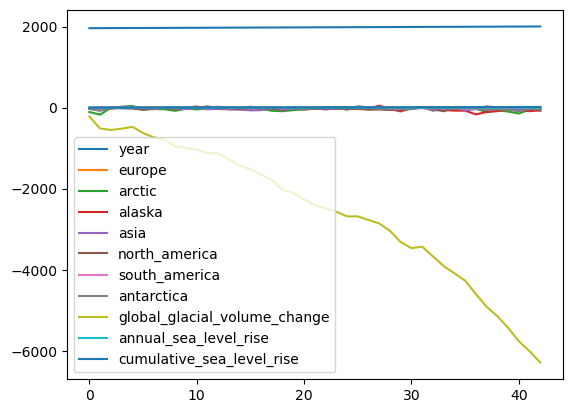

In [12]:
# one line plot per column with numeric data - a mess
df.plot()

As we can see, this doesn’t make any sense! In particular, look at the x-axis. The default for plot is to use the values of the index as the x-axis values. Let’s see some examples about how to improve this situation.

```
df.plot(x='x_values_column', y='y_values_column')
```

<AxesSubplot:xlabel='year'>

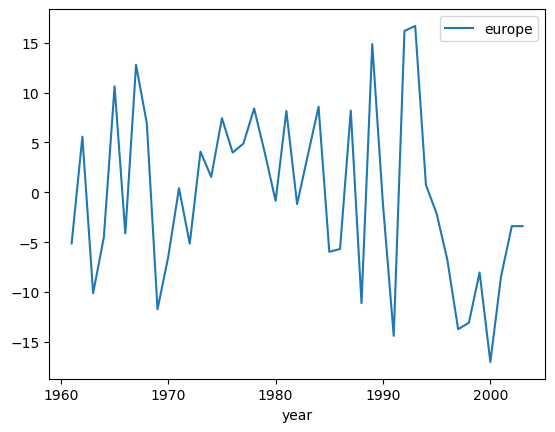

In [15]:
# change in glacial volume per year in Europe
df.plot(x='year', y='europe')

We can do some basic customization specifying other arguments of the plot function. Some basic ones are:

    title: Title to use for the plot.
    xlabel: Name to use for the xlabel on x-axis
    ylabel: Name to use for the ylabel on y-axis
    color: change the color of our plot


<AxesSubplot:title={'center':'Change in glacial volume per year in Europe'}, xlabel='Year', ylabel='\u200bChange in glacial volume (km3\u200b)'>

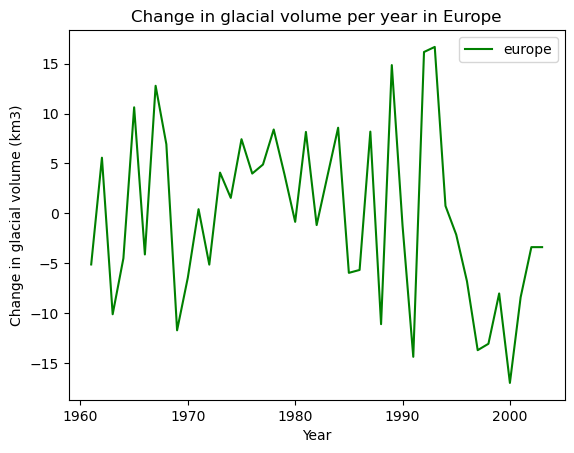

In [16]:
df.plot(x='year', 
        y='europe',
        title='Change in glacial volume per year in Europe',
        xlabel='Year',
        ylabel='​Change in glacial volume (km3​)',
        color='green'
        )

3.2.1 Multiple line plots

Let’s say we want to graph the change in glacial volume in the Arctic and Alaska. We can do it by updating these arguments:

    y : a list of column names that will be plotted against x
    color: specify the color of each column’s line with a dictionary {'col_1' : 'color_1', 'col_2':'color_2}


<AxesSubplot:title={'center':'Change in glacial volume per year in Alaska and the Arctic'}, xlabel='Year', ylabel='\u200bChange in glacial volume (km3\u200b)'>

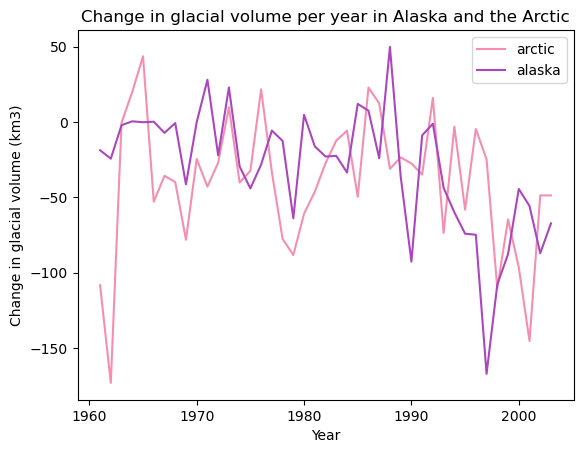

In [17]:
df.plot(x='year', 
        y=['arctic', 'alaska'],
        title = 'Change in glacial volume per year in Alaska and the Arctic',
        xlabel='Year',
        ylabel='​Change in glacial volume (km3​)',        
        color = {'arctic':'#F48FB1',
                 'alaska': '#AB47BC'
                 }
        )

Notice that for specifying the colors we used a HEX code, this gives us more control over how our graph looks.

We can also create separate plots for each column by setting the subset to True.

array([<AxesSubplot:xlabel='Year', ylabel='\u200bChange in glacial volume (km3\u200b)'>,
       <AxesSubplot:xlabel='Year', ylabel='\u200bChange in glacial volume (km3\u200b)'>],
      dtype=object)

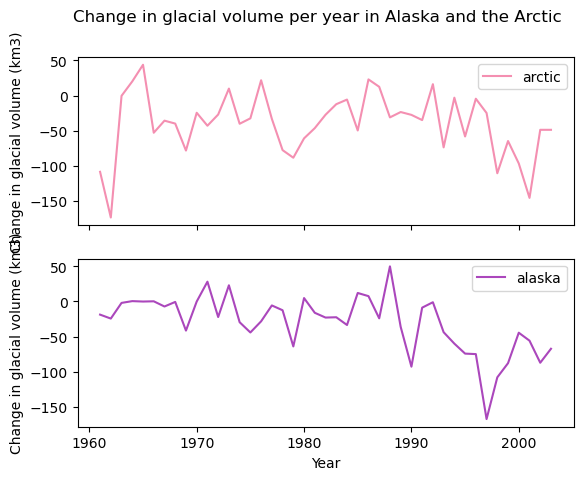

In [18]:
df.plot(x='year', 
        y=['arctic', 'alaska'],
        title = 'Change in glacial volume per year in Alaska and the Arctic',
        xlabel='Year',
        ylabel='​Change in glacial volume (km3​)',        
        color = {'arctic':'#F48FB1',
                 'alaska': '#AB47BC'
                 },
        subplots=True
        )

# Check - in
- 1. Plot a graph of the annual sea level rise with respect to the years.
- 2. What information is the columns variable retrieving from the data frame? Describe in a sentence what is being plotted.

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

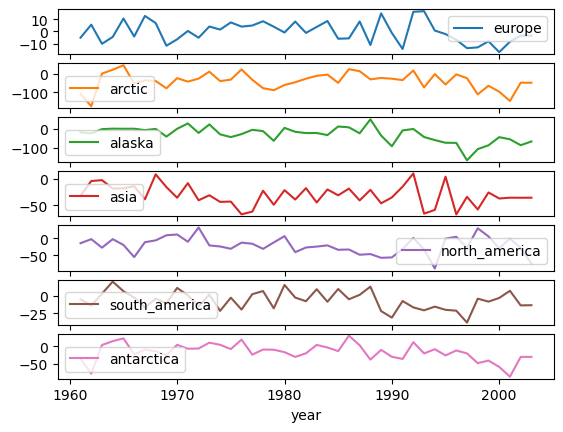

In [20]:
columns = df.loc[:,'europe':'antarctica'].columns
df.plot(x='year', 
        y=columns, 
        subplots=True)
#this is plotting the glacial loss from 1960-2000+ from europe through antarctica

## Palmer Penguins

we will read the dataset from te following URL

bit.ly/palmer-penguins.csv


In [23]:
# read in data

penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [26]:
# check column data types and # of non NA values in each column
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [27]:
# simple statistics about numeric columns
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [29]:
# for categorical data and the year
# count unique values
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [30]:
# get unique values for specific columns
# unique values in species column
print(penguins.species.unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [31]:
# species unique value count
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

# `kind()` argument in `plot()`
`plot()` default is creating a line plot

parameter that controls what kind of plot we get is called `kind()`

# Scatter plots

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

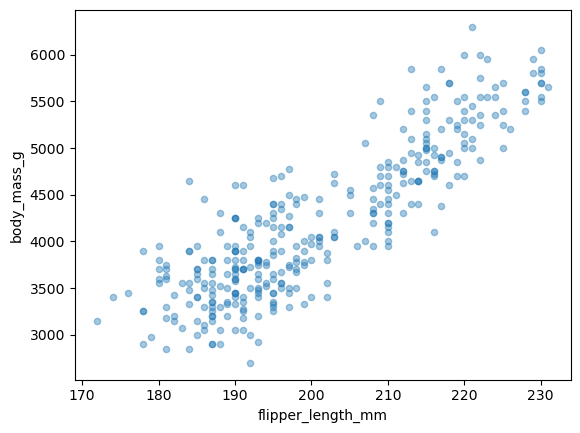

In [32]:
penguins.plot(kind='scatter',
             x='flipper_length_mm',
             y='body_mass_g',
             alpha=0.4 #controls transparency
             )

## Bar Plot

set `king='bar'`  in the`plot()` method

Example: we want to get data about the 10 penguins with the lowest body mass and visualize it

1. Find the penguins with smallest body sizes using `nsmallest()` method for series

In [34]:
smallest = penguins.body_mass_g.nsmallest(10)
smallest

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

In [ ]:
#sort values in decending order
smallest = penguins.body_mass_g.nsmallest(10).sort_values(ascending=False)
smallest

<AxesSubplot:>

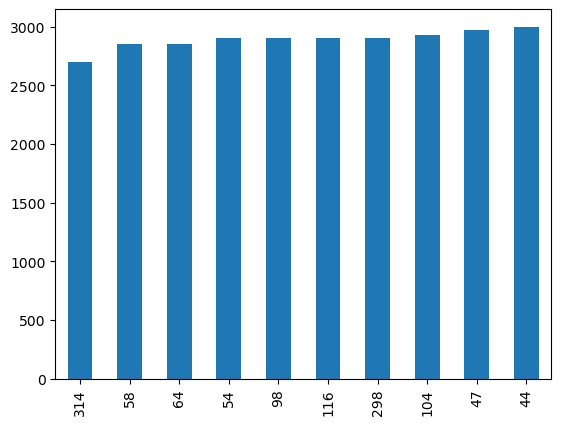

In [36]:
#plot smallest body masses as bars
smallest.plot(kind='bar')

What if we wanted to look at other data for the smallest penguins?
We can use the `index` of the `smallest` series to select those rows in the original `penguins` dataframe

In [ ]:
penguins.loc[smallest.index]
#using the index of another series to subselect the rows

## Histogram

to create a histogram, set `kind='hist'` in `plot()`

<AxesSubplot:ylabel='Frequency'>

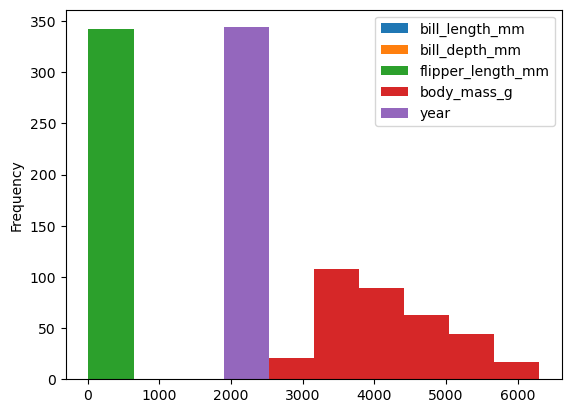

In [37]:
#using plot() without subsetting data - a mess again
penguins.plot(kind='hist')

<AxesSubplot:title={'center':'Penguins Flipper Length Distribution'}, ylabel='Frequency'>

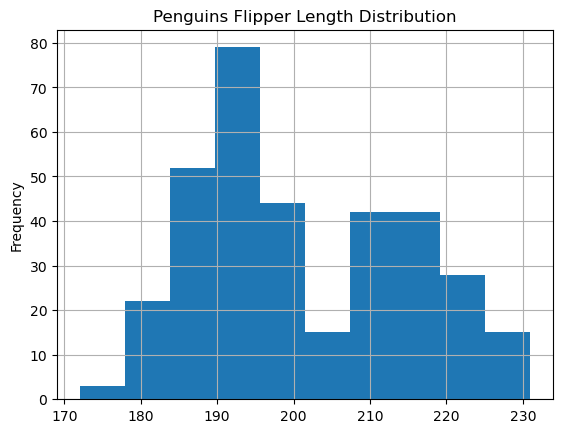

In [40]:
# distribution of flipper length measurments 
#first select the data then plot
penguins.flipper_length_mm.plot(kind='hist',
                              title = "Penguins Flipper Length Distribution",
                               grid = True)

bill_length_mm       AxesSubplot(0.125,0.11;0.352273x0.77)
bill_depth_mm     AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

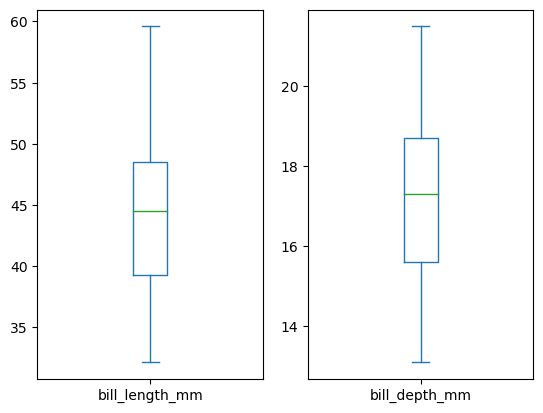

In [49]:
## Check in
box_select = penguins[['bill_length_mm', 'bill_depth_mm']]

box_select.plot(kind='box',
               subplots = True)

In [46]:
print(penguins)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [50]:
print(pd.__version__)

1.4.4


TypeError: 'DataFrame' object is not callable